A factory drains the water ($\rho = 10^3 kg m^{-3}$, cinematic viscosity $\nu = 10^{-6} m^2 s^{-1}$) from a lake in a mountain with a height difference of $50 m$. The steel tube has length $L = 400m$ and a diameter of $D= 400mm$. Throughout the tube there are five curves ($K_{curve} = 0.1$), six valves ($K_V = 0.08$) and an entry loss ($K_{ent} = 0.5$). Knowing that the equation of energy is given by:

\begin{equation}
p_1 + \frac{1}{2} \rho v_1^2 + \rho g h_1 =
p_2 + \frac{1}{2} \rho v_2^2 + \rho g h_" + \rho g h_f
\end{equation}

where we can consider the current line from the surface of the lake to the surface of the tank in the factory ($p_1 = p_2 = P_{atm}$ and $v_1 = v_2 = 0$) and $h_f$, the loss in the tube, constant,

\begin{equation}
h_f = \frac{v^2}{2g} \left( \sum_{i \in \text{local}} K_i + f \frac{L}{D} \right)
\end{equation}

whic his obtained by local contributions and by the friction throughout the tube. The Darcy friction factor, $f$, is obtained for turbulent flow by the Colebrook law,

\begin{equation}
\frac{1}{\sqrt{f}} = -2.0 \log_{10} \left( \frac{\epsilon / D}{3.7} + \frac{2.51}{Re \sqrt{f}} \right)
\end{equation}

with rugosity $\epsilon = 0.045mm$ in commercial steel and the Reynolds number is given by $Re = v D / \nu$. In these conditions determine the velocity of the water inside the tube.

---
I come to the following relations:

Through the energy equation I get:
\begin{equation}
h_f = 50 m
\end{equation}

Rearranging the equation for $h_f$ gives me:
\begin{equation}
v = \sqrt{\frac{2 g h_f}{\sum_{i} K_i + f \frac{L}{D}}}
\end{equation}

Substituting $Re = v D / \nu$ and subsequently substituting $v$ by the previous expression gives me a transcendental equation for $f$:
\begin{equation}
0 =
\frac{1}{\sqrt{f}} + 
2.0 \log_{10}
\left(
\frac{\epsilon / D}{3.7} +
\frac{2.57 \nu}{\sqrt{\frac{2 g h_f}{\sum_{i} K_i + f \frac{L}{D}}} D \sqrt{f}}
\right)
\end{equation}

I make use of the approximation methods for transcendental equations I developed earlier to find the value of $f$ and subsequently compute the velocity, $v$.

Note that the error for $f_{root}$ is below the numerical limit of the program (effectively 0). Knowing Darcy's friction factor it is possible to compute the flow velocity, $v$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import approx

In [2]:
K_curve = 0.1
K_V = 0.08
K_ent = 0.5

epsilon = 4.5e-5
D = 0.4
hf = 50
g = 9.8
K_total = 5*K_curve + 6*K_V + K_ent
L = 400
nu = 1e-6

args = [
        epsilon,
        D,
        hf,
        g,
        K_total,
        L,
        nu
        ]

def Darcy(args):
    epsilon, D, hf, g, K_total, L, nu = args
    
    f = np.linspace(0.001, 0.03, 100)
    y = lambda f: 1/np.sqrt(f) + 2.0 * np.log10(epsilon / D / 3.7 + 2.51 / (np.sqrt((hf * 2*g) / (K_total + f * L / D)) * D / nu * np.sqrt(f)))

    '''Estimating roots'''

    estimated_root = 0

    for i in range(len(f)-1):
        if y(f[i]) * y(f[i+1]) < 0:
            estimated_root = (f[i] + f[i+1])/2
            break


    '''Approximating root with Bolzano'''

    iterations = 100
    stop_condition = 1e-16

    df = f[1] - f[0]

    first_point = max(0, estimated_root - df)
    second_point = estimated_root + df
    point, error = approx.bolzano(y, estimated_root, first_point, second_point, iterations, stop_condition)[0:2]
    f_root = point[-1]
    error_y = abs(y(f_root))
    
    return f_root, error_y

def velocity(args):
    D, hf, g, K_total, L, f = args
    return np.sqrt(2*g*hf / (K_total + f * L / D))

In [3]:
f = np.linspace(0.001, 0.03, 100)
y = lambda f: 1/np.sqrt(f) + 2.0 * np.log10(epsilon / D / 3.7 + 2.51 / (np.sqrt((hf * 2*g) / (K_total + f * L / D)) * D / nu * np.sqrt(f)))

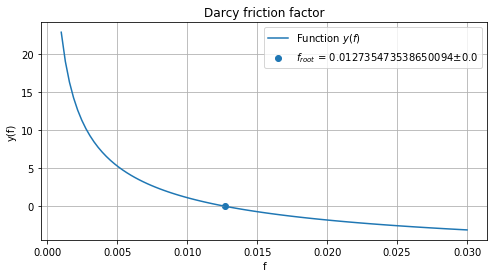

In [4]:
f_root, error = Darcy(args)

width, height = plt.figaspect(.5)
plt.figure(figsize=(width, height))
plt.title('Darcy friction factor')
plt.plot(f, y(f), label='Function $y(f)$')
plt.scatter(f_root, y(f_root), label='$f_{root}$ = ' + repr(f_root) + '$\pm$' + repr(error))
plt.xlabel('f')
plt.ylabel('y(f)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [5]:
args2 = [
        D,
        hf,
        g,
        K_total,
        L,
        f_root
        ]

v = velocity(args2)

print('The flow velocity in the tube is', v, 'meters per second.')

The flow velocity in the tube is 8.30294903615073 meters per second.
